<a href="https://colab.research.google.com/github/ConorD28/RISP-Research/blob/main/RISP_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 28.1 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def win_score(d):
  count = 0 #count how many times run scored
  win_exp = 0
  run_exp = 0 #get run exp

  for i in range(len(d)-1):
      if d.iloc[i, 2] == "Top": #check if top of inning
        win_exp = win_exp + (-1*d.iloc[i, 13]) #add change in away win exp
        run_exp = run_exp + d.iloc[i, 17] #get run exp
        if d.iloc[i, 7] != d.iloc[i, 14] : #check if away score changed
          count = count+1
      elif d.iloc[i, 2] == "Bot": #check if bottom of inning
        win_exp = win_exp + d.iloc[i, 13] #add change in home win exp
        run_exp = run_exp + d.iloc[i, 17] #get run exp
        if d.iloc[i, 8] != d.iloc[i, 15]: #check if home score changed
          count = count+1

  perc_scored = round((count/len(d) * 100),1) #calculates how often a run scored
  avg_run_exp = round((run_exp/len(d)*100),2) #calculate avg change in run exp
  avg_win_exp = round((win_exp/len(d)*100),2) #calculate avg change in win exp

  return avg_win_exp, avg_run_exp, perc_scored

In [ ]:
def approach_test(df, iterations): #test performace of appraoch using wpa, run value, and % times scored

  BIPs = df[df["events"].isin(["single", "double", "triple", "home_run", "field_out", "force_out",
                              "sac_fly", "grounded_into_double_play", "fielders_choice_out",
                              "fielders_choice", "double_play", "sac_fly_double_play",
                               "triple_play", "field_error"])]

  Non_adjusted = df[~df["events"].isin(["single", "double", "triple", "home_run", "field_out",
                                        "grounded_into_double_play", "sac_fly", "force_out",
                                        "strikeout", "walk"])]

  Non_adjusted_BIPs = df[df["events"].isin(["fielders_choice", "field_error", "sac_fly_double_play"
                                            "double_play"])] #get BIPs that were not adjusted

  BIPs_len = len(BIPs) #BIPs length
  PAs_len = len(df)
  singles_add = round(BIPs_len * .01852)
  doubles_drop = round(BIPs_len * .01016)
  triples_add = round(BIPs_len * .00055)
  homers_drop = round(BIPs_len * .02155)
  field_outs_drop = round(BIPs_len * .171)
  GIDP_drop = round(BIPs_len*.005)
  sac_flies_drop = round(BIPs_len*.002)
  force_outs_drop = round(BIPs_len*.001)
  Ks_drop = round(PAs_len * .05040)
  BBs_drop = round(PAs_len * .0423)

  singles = df[df["events"] == "single"]
  doubles = df[df["events"] == "double"]
  triples = df[df["events"] == "triple"]
  homers = df[df["events"] == "home_run"]
  field_outs = df[df["events"] == "field_out"]
  GIDPs = df[df["events"] == "grounded_into_double_play"]
  sac_flies = df[df["events"] == "sac_fly"]
  force_outs = df[df["events"] == "force_out"]
  Ks = df[df["events"] == "strikeout"]
  BBs = df[df["events"] == "walk"]

  total_win_exp = 0
  total_perc_scored = 0
  total_run_exp = 0

  for i in range(iterations):
    singles = singles.sample(frac = 1)
    doubles = doubles.sample(frac = 1)
    triples = triples.sample(frac = 1)
    homers = homers.sample(frac = 1)
    field_outs = field_outs.sample(frac = 1)
    GIDPs = GIDPs.sample(frac = 1)
    sac_flies = sac_flies.sample(frac = 1)
    force_outs = force_outs.sample(frac = 1)
    Ks = Ks.sample(frac = 1)
    BBs = BBs.sample(frac = 1)
    Non_adjusted = Non_adjusted.sample(frac = 1)
    Non_adjusted_BIPs = Non_adjusted_BIPs.sample(frac = 1)

    singles_subset = singles.sample(singles_add)
    triples_subset = triples.sample(triples_add)
    doubles_subset = doubles.iloc[doubles_drop:]
    homers_subset = homers.iloc[homers_drop:]
    field_outs_subset = field_outs.iloc[field_outs_drop:]
    GIDP_subset = GIDPs.iloc[GIDP_drop:]
    sac_flies_subset = sac_flies.iloc[sac_flies_drop:]
    force_outs_subset = force_outs.iloc[force_outs_drop:]
    Ks_subset = Ks.iloc[Ks_drop:]
    BBs_subset = BBs.iloc[BBs_drop:]

    doubles_dropped = len(doubles) - len(doubles_subset)
    homers_dropped = len(homers) - len(homers_subset)
    field_outs_dropped = len(field_outs) - len(field_outs_subset)
    GIDP_dropped = len(GIDPs) - len(GIDP_subset)
    sac_flies_dropped = len(sac_flies) - len(sac_flies_subset)
    force_outs_dropped = len(force_outs) - len(force_outs_subset)
    Ks_dropped = len(Ks) - len(Ks_subset)
    BBs_dropped = len(BBs) - len(BBs_subset)

    num_to_add = Ks_dropped + BBs_dropped #number of plays to add after removing walks and Ks
    BIPs_to_add = (doubles_dropped + homers_dropped
    + field_outs_dropped + GIDP_dropped + sac_flies_dropped + force_outs_dropped) - (singles_add + triples_add)
    #num of BIPs to add to df so same length as before adjusting and same number of BIPs as before adjusting BIPs
    new_singles_total = pd.concat([singles, singles_subset])
    new_triples_total = pd.concat([triples, triples_subset])

    if len(Non_adjusted) >= num_to_add:
      Plays_add = Non_adjusted.iloc[0:num_to_add]
    else:
      Plays_add = Non_adjusted
      while len(Plays_add) < num_to_add:
        Plays_add = pd.concat([Plays_add, Plays_add])
      if len(Plays_add) > num_to_add:
        num_to_drop = len(Plays_add) - num_to_add
        Plays_add = Plays_add.iloc[num_to_drop:]
    #print(len(Plays_add))
    #print(num_to_add)

    approach = pd.concat([BBs_subset, Ks_subset])
    approach = pd.concat([approach, Non_adjusted]) #all other plays
    approach = pd.concat([approach, Plays_add]) #add to make df same length as before
    approach = pd.concat([approach, new_triples_total])
    approach = pd.concat([approach, new_singles_total])
    approach = pd.concat([approach, doubles_subset])
    approach = pd.concat([approach, homers_subset])
    approach = pd.concat([approach, field_outs_subset])
    approach = pd.concat([approach, GIDP_subset])
    approach = pd.concat([approach, sac_flies_subset])
    approach = pd.concat([approach, force_outs_subset])

    if len(Non_adjusted_BIPs) >= BIPs_to_add:
      Plays_add2 = Non_adjusted_BIPs.iloc[0:BIPs_to_add]
    else:
      Plays_add2 = Non_adjusted_BIPs
      while len(Plays_add2) < BIPs_to_add:
        Plays_add2 = pd.concat([Plays_add2, Plays_add2])
      if len(Plays_add2) > BIPs_to_add:
        num_to_drop2 = len(Plays_add2) - BIPs_to_add
        Plays_add2 = Plays_add2.iloc[num_to_drop2:]

    #print(len(Plays_add2))
    #print(BIPs_to_add)

    approach = pd.concat([approach, Plays_add2]) #add to make df same length as before

    if len(df) != len(approach):
      print("Error - not same size as before modifying")
      print(len(df))
      print(len(approach))
      break

    win_exp, run_exp, perc_scored = win_score(approach)

    total_win_exp = total_win_exp + win_exp
    total_perc_scored = total_perc_scored + perc_scored
    total_run_exp = total_run_exp + run_exp

  avg_win_exp = round(total_win_exp/iterations, 2)
  avg_perc_scored = round(total_perc_scored/iterations, 1)
  avg_run_exp = round(total_run_exp/iterations, 2)
  return avg_win_exp, avg_run_exp, avg_perc_scored

# **2023 RISP Different Approach Test:**

In [ ]:
df_23 = statcast(start_dt="2023-03-30", end_dt="2023-10-01")[["game_pk", "inning", "inning_topbot",
                                                             "outs_when_up", "on_2b",
                                                             "on_3b", "estimated_woba_using_speedangle",
                                                             "post_away_score",
                                                             "post_home_score",
                                                             "balls", "strikes",
                                                           "events", "batter", "delta_home_win_exp",
                                                           "away_score", "home_score", "on_1b",
                                                              "delta_run_exp", "des", "home_team", "away_team"]]

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 186/186 [02:38<00:00,  1.18it/s]
/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the resul

In [ ]:
df_23["on_3b"] = df_23["on_3b"].fillna(0) #Instead of NA signaling no runner on the base have 0 indicate no runner on the base
df_23["on_2b"] = df_23["on_2b"].fillna(0)
df_23["on_1b"] = df_23["on_1b"].fillna(0)
data = df_23[df_23['events'].notna()] #drop NA values in events (pitches) so now play by play and not pitch by pitch
data = data[data['delta_home_win_exp'].notna()] #drop NAs in delta home win exp
data = data[data['delta_run_exp'].notna()] #drop NAs in delta run exp
data = data[data["des"].str.contains("bunt")==False] #drop bunts
two_strike_hitters_IDs = [547989, 641355, 593428, 592192, 666185, 592206, 650489, 624424,
                          661388, 575929, 543063, 443558, 518595, 646240, 572816, 596748,
                          670770, 665926, 502671, 665489, 547180, 546318, 672386, 666139,
                          516782, 641857, 425877, 571976, 607043, 658668, 621566, 607054,
                          595777, 405395, 623912, 650859, 623993, 596103, 669257, 624641,
                          621035, 650402, 607208, 649966]
df = data[~data['batter'].isin(two_strike_hitters_IDs)]

**Splits:**

In [ ]:
#Non Away/Home:
RISP = df[(df["on_3b"] > 0) | (df["on_2b"] > 0)]
Two_strikes = RISP[RISP["strikes"] == 2]
under_2_strikes = RISP[RISP["strikes"] < 2]
Two_outs = RISP[(RISP["outs_when_up"] ==2)]
under_2_outs = RISP[(RISP["outs_when_up"] <2)]
Two_outs_2_strikes = Two_outs[Two_outs["strikes"] == 2]
under_2_outs_2_strikes = under_2_outs[under_2_outs["strikes"] == 2]
under_2_outs_2_strikes_close = under_2_outs_2_strikes[abs(under_2_outs_2_strikes["home_score"] - under_2_outs_2_strikes["away_score"]) < 3]
Two_outs_under_2_strikes = Two_outs[Two_outs["strikes"] < 2]
under_2_outs_under_2_strikes = under_2_outs[under_2_outs["strikes"] < 2]
Two_outs_under_2_strikes_large = Two_outs_under_2_strikes[abs(Two_outs_under_2_strikes["home_score"] - Two_outs_under_2_strikes["away_score"]) >= 3]
under_2_outs_under_2_strikes_close = under_2_outs_under_2_strikes[abs(under_2_outs_under_2_strikes["home_score"] - under_2_outs_under_2_strikes["away_score"]) < 3]
First_to_3rd = RISP[RISP["inning"] < 4]
Fourth_to_6th = RISP[(RISP["inning"] > 3) & (RISP["inning"] < 7)]
Seventh_to_9th = RISP[(RISP["inning"] > 6) & (RISP["inning"] < 9)]
First_to_3rd_close = First_to_3rd[abs((First_to_3rd["away_score"] - First_to_3rd["home_score"])) < 3]
Fourth_to_6th_close = Fourth_to_6th[abs((Fourth_to_6th["away_score"] - Fourth_to_6th["home_score"])) < 3]
Seventh_to_9th_close = Seventh_to_9th[abs((Seventh_to_9th["away_score"] - Seventh_to_9th["home_score"])) < 3]
First_to_3rd_large = First_to_3rd[abs((First_to_3rd["away_score"] - First_to_3rd["home_score"])) >= 3]
Fourth_to_6th_large = Fourth_to_6th[abs((Fourth_to_6th["away_score"] - Fourth_to_6th["home_score"])) >= 3]
Seventh_to_9th_large = Seventh_to_9th[abs((Seventh_to_9th["away_score"] - Seventh_to_9th["home_score"])) >= 3]

#Away:
away = RISP[RISP["inning_topbot"] == "Top"]
away_2_strikes = away[away["strikes"] == 2]
away_under_2_strikes = away[away["strikes"] < 2]
away_2_outs = away[(away["outs_when_up"] ==2)]
away_under_2_outs = away[(away["outs_when_up"] <2)]
away_2_outs_2_strikes = away_2_outs[away_2_outs["strikes"] == 2]
away_under_2_outs_2_strikes = away_under_2_outs[away_under_2_outs["strikes"] == 2]
away_under_2_outs_2_strikes_close = away_under_2_outs_2_strikes[abs(away_under_2_outs_2_strikes["home_score"] - away_under_2_outs_2_strikes["away_score"]) < 3]
away_2_outs_under_2_strikes = away_2_outs[away_2_outs["strikes"] < 2]
away_under_2_outs_under_2_strikes = away_under_2_outs[away_under_2_outs["strikes"] < 2]
away_2_outs_under_2_strikes_large = away_2_outs_under_2_strikes[abs(away_2_outs_under_2_strikes["home_score"] - away_2_outs_under_2_strikes["away_score"]) >= 3]
away_under_2_outs_under_2_strikes_close = away_under_2_outs_under_2_strikes[abs(away_under_2_outs_under_2_strikes["home_score"] - away_under_2_outs_under_2_strikes["away_score"]) < 3]
away_1st_to_3rd = away[away["inning"] < 4]
away_4th_to_6th = away[(away["inning"] > 3) & (away["inning"] < 7)]
away_7th_to_9th = away[(away["inning"] > 6) & (away["inning"] < 9)]
away_1st_to_3rd_close = away_1st_to_3rd[abs((away_1st_to_3rd["away_score"] - away_1st_to_3rd["home_score"])) < 3]
away_4th_to_6th_close = away_4th_to_6th[abs((away_4th_to_6th["away_score"] - away_4th_to_6th["home_score"])) < 3]
away_7th_to_9th_close = away_7th_to_9th[abs((away_7th_to_9th["away_score"] - away_7th_to_9th["home_score"])) < 3]
away_1st_to_3rd_large = away_1st_to_3rd[abs((away_1st_to_3rd["away_score"] - away_1st_to_3rd["home_score"])) >= 3]
away_4th_to_6th_large = away_4th_to_6th[abs((away_4th_to_6th["away_score"] - away_4th_to_6th["home_score"])) >= 3]
away_7th_to_9th_large = away_7th_to_9th[abs((away_7th_to_9th["away_score"] - away_7th_to_9th["home_score"])) >= 3]

#Home:
home = RISP[RISP["inning_topbot"] == "Bot"]
home_2_strikes = home[home["strikes"] == 2]
home_under_2_strikes = home[home["strikes"] < 2]
home_2_outs = home[(home["outs_when_up"] ==2)]
home_under_2_outs = home[(home["outs_when_up"] <2)]
home_under_2_outs_2_strikes = home_2_strikes[home_2_strikes["outs_when_up"] <2]
home_2_outs_2_strikes = home_2_outs[home_2_outs["strikes"] == 2]
home_under_2_outs_2_strikes_close = home_under_2_outs_2_strikes[abs(home_under_2_outs_2_strikes["home_score"] - home_under_2_outs_2_strikes["away_score"]) < 3] #
home_2_outs_under_2_strikes = home_2_outs[home_2_outs["strikes"] < 2]
home_under_2_outs_under_2_strikes = home_under_2_outs[home_under_2_outs["strikes"] < 2]
home_2_outs_under_2_strikes_large = home_2_outs_under_2_strikes[abs(home_2_outs_under_2_strikes["home_score"] - home_2_outs_under_2_strikes["away_score"]) >= 3]
home_under_2_outs_under_2_strikes_close = home_under_2_outs_under_2_strikes[abs(home_under_2_outs_under_2_strikes["home_score"] - home_under_2_outs_under_2_strikes["away_score"]) < 3]
home_1st_to_3rd = home[home["inning"] < 4]
home_4th_to_6th = home[(home["inning"] > 3) & (home["inning"] < 7)]
home_7th_to_9th = home[(home["inning"] > 6) & (home["inning"] < 9)]
home_1st_to_3rd_close = home_1st_to_3rd[abs((home_1st_to_3rd["home_score"] - home_1st_to_3rd["away_score"])) < 3]
home_4th_to_6th_close = home_4th_to_6th[abs((home_4th_to_6th["home_score"] - home_4th_to_6th["away_score"])) < 3]
home_7th_to_9th_close = home_7th_to_9th[abs((home_7th_to_9th["home_score"] - home_7th_to_9th["away_score"])) < 3]
home_1st_to_3rd_large = home_1st_to_3rd[abs((home_1st_to_3rd["home_score"] - home_1st_to_3rd["away_score"])) >= 3]
home_4th_to_6th_large = home_4th_to_6th[abs((home_4th_to_6th["home_score"] - home_4th_to_6th["away_score"])) >= 3]
home_7th_to_9th_large = home_7th_to_9th[abs((home_7th_to_9th["home_score"] - home_7th_to_9th["away_score"])) >= 3]

In [ ]:
#Non Away/Home:
RISP_WS = win_score(RISP)
under_2_strikes_WS = win_score(under_2_strikes)
Two_strikes_WS = win_score(Two_strikes)
Two_outs_WS = win_score(Two_outs)
under_2_outs_WS = win_score(under_2_outs)
Two_outs_2_strikes_WS = win_score(Two_outs_2_strikes)
under_2_outs_2_strikes_WS = win_score(under_2_outs_2_strikes)
under_2_outs_2_strikes_close_WS = win_score(under_2_outs_2_strikes_close)
Two_outs_under_2_strikes_WS = win_score(Two_outs_under_2_strikes)
under_2_outs_under_2_strikes_WS = win_score(under_2_outs_under_2_strikes)
Two_outs_under_2_strikes_large_WS = win_score(Two_outs_under_2_strikes_large)
under_2_outs_under_2_strikes_close_WS = win_score(under_2_outs_under_2_strikes_close)
First_to_3rd_WS = win_score(First_to_3rd)
Fourth_to_6th_WS = win_score(Fourth_to_6th)
Seventh_to_9th_WS = win_score(Seventh_to_9th)
First_to_3rd_close_WS = win_score(First_to_3rd_close)
Fourth_to_6th_close_WS = win_score(Fourth_to_6th_close)
Seventh_to_9th_close_WS = win_score(Seventh_to_9th_close)
Fourth_to_6th_large_WS = win_score(Fourth_to_6th_large)
Seventh_to_9th_large_WS = win_score(Seventh_to_9th_large)

In [ ]:
#Away:
away_WS = win_score(away)
away_2_strikes_WS = win_score(away_2_strikes)
away_under_2_strikes_WS = win_score(away_under_2_strikes)
away_2_outs_WS = win_score(away_2_outs)
away_under_2_outs_WS = win_score(away_under_2_outs)
away_2_outs_2_strikes_WS = win_score(away_2_outs_2_strikes)
away_under_2_outs_2_strikes_WS = win_score(away_under_2_outs_2_strikes)
away_under_2_outs_2_strikes_close_WS = win_score(away_under_2_outs_2_strikes_close)
away_2_outs_under_2_strikes_WS = win_score(away_2_outs_under_2_strikes)
away_under_2_outs_under_2_strikes_WS = win_score(away_under_2_outs_under_2_strikes)
away_under_2_outs_under_2_strikes_close_WS = win_score(away_under_2_outs_under_2_strikes_close)
away_1st_to_3rd_WS = win_score(away_1st_to_3rd)
away_4th_to_6th_WS = win_score(away_4th_to_6th)
away_7th_to_9th_WS = win_score(away_7th_to_9th)
away_1st_to_3rd_close_WS = win_score(away_1st_to_3rd_close)
away_4th_to_6th_close_WS = win_score(away_4th_to_6th_close)

In [ ]:
#Home:
home_WS = win_score(home)
home_2_strikes_WS = win_score(home_2_strikes)
home_under_2_strikes_WS = win_score(home_under_2_strikes)
home_2_outs_WS = win_score(home_2_outs)
home_under_2_outs_WS = win_score(home_under_2_outs)
home_2_outs_2_strikes_WS = win_score(home_2_outs_2_strikes)
home_under_2_outs_2_strikes_WS = win_score(home_under_2_outs_2_strikes)
home_under_2_outs_2_strikes_close_WS = win_score(home_under_2_outs_2_strikes_close)
home_2_outs_under_2_strikes_WS = win_score(home_2_outs_under_2_strikes)
home_under_2_outs_under_2_strikes_WS = win_score(home_under_2_outs_under_2_strikes)
home_under_2_outs_under_2_strikes_close_WS = win_score(home_under_2_outs_under_2_strikes_close)
home_1st_to_3rd_WS = win_score(home_1st_to_3rd)
home_4th_to_6th_WS = win_score(home_4th_to_6th)
home_7th_to_9th_WS = win_score(home_7th_to_9th)
home_1st_to_3rd_close_WS = win_score(home_1st_to_3rd_close)
home_4th_to_6th_close_WS = win_score(home_4th_to_6th_close)

 **Stats if League Used 2 Strike Approach (2023):**

In [ ]:
RISP_AT = approach_test(RISP, 10)

In [ ]:
Two_strikes_AT = approach_test(Two_strikes, 10)

In [ ]:
under_2_strikes_AT = approach_test(under_2_strikes, 10)

In [ ]:
Two_outs_AT = approach_test(Two_outs, 10)

In [ ]:
under_2_outs_AT = approach_test(under_2_outs, 10)

In [ ]:
Two_outs_2_strikes_AT = approach_test(Two_outs_2_strikes, 10)

In [ ]:
under_2_outs_2_strikes_AT = approach_test(under_2_outs_2_strikes, 10)
under_2_outs_2_strikes_close_AT = approach_test(under_2_outs_2_strikes_close, 10)
Two_outs_under_2_strikes_AT = approach_test(Two_outs_under_2_strikes, 10)

In [ ]:
under_2_outs_under_2_strikes_AT = approach_test(under_2_outs_under_2_strikes, 10)
Two_outs_under_2_strikes_large_AT = approach_test(Two_outs_under_2_strikes_large, 10)
under_2_outs_under_2_strikes_close_AT = approach_test(under_2_outs_under_2_strikes_close, 10)

In [ ]:
First_to_3rd_AT = approach_test(First_to_3rd, 10)
Fourth_to_6th_AT = approach_test(Fourth_to_6th, 10)
Seventh_to_9th_AT = approach_test(Seventh_to_9th, 10)

In [ ]:
First_to_3rd_close_AT = approach_test(First_to_3rd_close, 10)
Fourth_to_6th_close_AT = approach_test(Fourth_to_6th_close, 10)
Seventh_to_9th_close_AT = approach_test(Seventh_to_9th_close, 10)

In [ ]:
Fourth_to_6th_large_AT = approach_test(Fourth_to_6th_large, 10)
Seventh_to_9th_large_AT = approach_test(Seventh_to_9th_large, 10)

**Away:**

In [ ]:
away_AT = approach_test(away, 10)
away_2_strikes_AT = approach_test(away_2_strikes, 10)

In [ ]:
away_under_2_strikes_AT = approach_test(away_under_2_strikes, 10)
away_2_outs_AT = approach_test(away_2_outs, 10)
away_under_2_outs_AT = approach_test(away_under_2_outs, 10)

In [ ]:
away_2_outs_2_strikes_AT = approach_test(away_2_outs_2_strikes, 10)
away_under_2_outs_2_strikes_AT = approach_test(away_under_2_outs_2_strikes, 10)
away_under_2_outs_2_strikes_close_AT = approach_test(away_under_2_outs_2_strikes_close, 10)

In [ ]:
away_2_outs_under_2_strikes_AT = approach_test(away_2_outs_under_2_strikes, 10)
away_under_2_outs_under_2_strikes_AT = approach_test(away_under_2_outs_under_2_strikes, 10)
away_2_outs_under_2_strikes_large_AT = approach_test(away_2_outs_under_2_strikes_large, 10)

In [ ]:
away_under_2_outs_under_2_strikes_close_AT = approach_test(away_under_2_outs_under_2_strikes_close, 10)
away_1st_to_3rd_AT = approach_test(away_1st_to_3rd, 10)
away_4th_to_6th_AT = approach_test(away_4th_to_6th, 10)

In [ ]:
away_7th_to_9th_AT = approach_test(away_7th_to_9th, 10)
away_1st_to_3rd_close_AT = approach_test(away_1st_to_3rd_close, 10)
away_4th_to_6th_close_AT = approach_test(away_4th_to_6th_close, 10)

**Home**:

In [ ]:
home_AT = approach_test(home, 10)
home_2_strikes_AT = approach_test(home_2_strikes, 10)

In [ ]:
home_under_2_strikes_AT = approach_test(home_under_2_strikes, 10)
home_2_outs_AT = approach_test(home_2_outs, 10)
home_under_2_outs_AT = approach_test(home_under_2_outs, 10)

In [ ]:
home_2_outs_2_strikes_AT = approach_test(home_2_outs_2_strikes, 10)
home_under_2_outs_2_strikes_AT = approach_test(home_under_2_outs_2_strikes, 10)
home_under_2_outs_2_strikes_close_AT = approach_test(home_under_2_outs_2_strikes_close, 10)

In [ ]:
home_2_outs_under_2_strikes_AT = approach_test(home_2_outs_under_2_strikes, 10)
home_under_2_outs_under_2_strikes_AT = approach_test(home_under_2_outs_under_2_strikes, 10)
home_2_outs_under_2_strikes_large_AT = approach_test(home_2_outs_under_2_strikes_large, 10)

In [ ]:
home_under_2_outs_under_2_strikes_close_AT = approach_test(home_under_2_outs_under_2_strikes_close, 10)
home_1st_to_3rd_AT = approach_test(home_1st_to_3rd, 10)
home_4th_to_6th_AT = approach_test(home_4th_to_6th, 10)

In [ ]:
home_7th_to_9th_AT = approach_test(home_7th_to_9th, 10)
home_1st_to_3rd_close_AT = approach_test(home_1st_to_3rd_close, 10)
home_4th_to_6th_close_AT = approach_test(home_4th_to_6th_close, 10)

**Stats with RISP 2023 Output Table**

In [ ]:
index_labels = ['RISP', '2 Strikes', "under 2 strikes", "2 outs", "under_2_outs", "2_outs_2_strikes", "under_2_outs_2_strikes", "under_2_outs_2_strikes_close",
                "2_outs_under_2_strikes", "under_2_outs_under_2_strikes", "2_outs_under_2_strikes_large", "under_2_outs_under_2_strikes_close", "1st_to_3rd",
"4th_to_6th", "7th_to_9th", "1st_to_3rd_close", "4th_to_6th_close", "7th_to_9th_close",
"4th_to_6th_large", "7th_to_9th_large", "Away", "Away_2_strikes", "Away_under_2_strikes", "Away_2_outs", "Away_under_2_outs",
"Away_2_outs_2_strikes", "Away_under_2_outs_2_strikes", "Away_under_2_outs_2_strikes_close", "Away_2_outs_under_2_strikes", "Away_under_2_outs_under_2_strikes",
                "Away_under_2_outs_under_2_strikes_close",
                "Away_1st_to_3rd", "Away_4th_to_6th", "Away_7th_to_9th", "Away_1st_to_3rd_close",
                "Away_4th_to_6th_close", "Home", "Home_2_strikes", "Home_under_2_strikes",
                "Home_2_outs", "Home_under_2_outs", "Home_2_outs_2_strikes", "Home_under_2_outs_2_strikes",
                "Home_under_2_outs_2_strikes_close", "Home_2_outs_under_2_strikes",
                "Home_under_2_outs_under_2_strikes",
                "Home_under_2_outs_under_2_strikes_close", "Home_1st_to_3rd", "Home_4th_to_6th",
                "Home_7th_to_9th", "Home_1st_to_3rd_close", "Home_4th_to_6th_close"]
column_lables = ["Size of Dataframe", "WPA", "Run Value", "Percent Scored", "WPA_Adjusted",
                 "Run Value_Adjusted", "Percent Scored_Adjusted"]
df_outputs = pd.DataFrame([[len(RISP), RISP_WS[0], RISP_WS[1], RISP_WS[2], RISP_AT[0], RISP_AT[1], RISP_AT[2]],
 [len(Two_strikes), Two_strikes_WS[0], Two_strikes_WS[1], Two_strikes_WS[2], Two_strikes_AT[0], Two_strikes_AT[1], Two_strikes_AT[2]],
 [len(under_2_strikes), under_2_strikes_WS[0], under_2_strikes_WS[1], under_2_strikes_WS[2], under_2_strikes_AT[0], under_2_strikes_AT[1], under_2_strikes_AT[2]],
 [len(Two_outs), Two_outs_WS[0], Two_outs_WS[1], Two_outs_WS[2], Two_outs_AT[0], Two_outs_AT[1], Two_outs_AT[2]],
 [len(under_2_outs), under_2_outs_WS[0], under_2_outs_WS[1], under_2_outs_WS[2], under_2_outs_AT[0], under_2_outs_AT[1], under_2_outs_AT[2]],
 [len(Two_outs_2_strikes), Two_outs_2_strikes_WS[0], Two_outs_2_strikes_WS[1], Two_outs_2_strikes_WS[2],
  Two_outs_2_strikes_AT[0], Two_outs_2_strikes_AT[1], Two_outs_2_strikes_AT[2]],
 [len(under_2_outs_2_strikes), under_2_outs_2_strikes_WS[0], under_2_outs_2_strikes_WS[1],
  under_2_outs_2_strikes_WS[2], under_2_outs_2_strikes_AT[0], under_2_outs_2_strikes_AT[1], under_2_outs_2_strikes_AT[2]],
 [len(under_2_outs_2_strikes_close), under_2_outs_2_strikes_close_WS[0], under_2_outs_2_strikes_close_WS[1],
  under_2_outs_2_strikes_close_WS[2], under_2_outs_2_strikes_close_AT[0], under_2_outs_2_strikes_close_AT[1], under_2_outs_2_strikes_close_AT[2]],
 [len(Two_outs_under_2_strikes), Two_outs_under_2_strikes_WS[0], Two_outs_under_2_strikes_WS[1], Two_outs_under_2_strikes_WS[2],
  Two_outs_under_2_strikes_AT[0], Two_outs_under_2_strikes_AT[1], Two_outs_under_2_strikes_AT[2]],
 [len(under_2_outs_under_2_strikes), under_2_outs_under_2_strikes_WS[0], under_2_outs_under_2_strikes_WS[1], under_2_outs_under_2_strikes_WS[2],
  under_2_outs_under_2_strikes_AT[0], under_2_outs_under_2_strikes_AT[1], under_2_outs_under_2_strikes_AT[2]],
 [len(Two_outs_under_2_strikes_large), Two_outs_under_2_strikes_large_WS[0], Two_outs_under_2_strikes_large_WS[1], Two_outs_under_2_strikes_large_WS[2],
  Two_outs_under_2_strikes_large_AT[0], Two_outs_under_2_strikes_large_AT[1], Two_outs_under_2_strikes_large_AT[2]],
 [len(under_2_outs_under_2_strikes_close), under_2_outs_under_2_strikes_close_WS[0], under_2_outs_under_2_strikes_close_WS[1], under_2_outs_under_2_strikes_close_WS[2],
  under_2_outs_under_2_strikes_close_AT[0], under_2_outs_under_2_strikes_close_AT[1], under_2_outs_under_2_strikes_close_AT[2]],
 [len(First_to_3rd), First_to_3rd_WS[0], First_to_3rd_WS[1], First_to_3rd_WS[2], First_to_3rd_AT[0], First_to_3rd_AT[1], First_to_3rd_AT[2]],
 [len(Fourth_to_6th), Fourth_to_6th_WS[0], Fourth_to_6th_WS[1], Fourth_to_6th_WS[2], Fourth_to_6th_AT[0], Fourth_to_6th_AT[1], Fourth_to_6th_AT[2]],
 [len(Seventh_to_9th), Seventh_to_9th_WS[0], Seventh_to_9th_WS[1], Seventh_to_9th_WS[2], Seventh_to_9th_AT[0], Seventh_to_9th_AT[1], Seventh_to_9th_AT[2]],
 [len(First_to_3rd_close), First_to_3rd_close_WS[0], First_to_3rd_close_WS[1], First_to_3rd_close_WS[2], First_to_3rd_close_AT[0], First_to_3rd_close_AT[1],
  First_to_3rd_close_AT[2]],
 [len(Fourth_to_6th_close), Fourth_to_6th_close_WS[0], Fourth_to_6th_close_WS[1], Fourth_to_6th_close_WS[2], Fourth_to_6th_close_AT[0], Fourth_to_6th_close_AT[1],
  Fourth_to_6th_close_AT[2]],
 [len(Seventh_to_9th_close), Seventh_to_9th_close_WS[0], Seventh_to_9th_close_WS[1], Seventh_to_9th_close_WS[2], Seventh_to_9th_close_AT[0], Seventh_to_9th_close_AT[1],
  Seventh_to_9th_close_AT[2]],
 [len(Fourth_to_6th_large), Fourth_to_6th_large_WS[0], Fourth_to_6th_large_WS[1], Fourth_to_6th_large_WS[2], Fourth_to_6th_large_AT[0], Fourth_to_6th_large_AT[1],
  Fourth_to_6th_large_AT[2]],
 [len(Seventh_to_9th_large), Seventh_to_9th_large_WS[0], Seventh_to_9th_large_WS[1], Seventh_to_9th_large_WS[2], Seventh_to_9th_large_AT[0], Seventh_to_9th_large_AT[1],
  Seventh_to_9th_large_AT[2]],
 [len(away), away_WS[0], away_WS[1], away_WS[2], away_AT[0], away_AT[1], away_AT[2]],
 [len(away_2_strikes), away_2_strikes_WS[0], away_2_strikes_WS[1], away_2_strikes_WS[2], away_2_strikes_AT[0], away_2_strikes_AT[1], away_2_strikes_AT[2]],
 [len(away_under_2_strikes), away_under_2_strikes_WS[0], away_under_2_strikes_WS[1], away_under_2_strikes_WS[2], away_under_2_strikes_AT[0], away_under_2_strikes_AT[1], away_under_2_strikes_AT[2]],
 [len(away_2_outs), away_2_outs_WS[0], away_2_outs_WS[1], away_2_outs_WS[2], away_2_outs_AT[0], away_2_outs_AT[1], away_2_outs_AT[2]],
 [len(away_under_2_outs), away_under_2_outs_WS[0], away_under_2_outs_WS[1], away_under_2_outs_WS[2], away_under_2_outs_AT[0], away_under_2_outs_AT[1], away_under_2_outs_AT[2]],
 [len(away_2_outs_2_strikes), away_2_outs_2_strikes_WS[0], away_2_outs_2_strikes_WS[1], away_2_outs_2_strikes_WS[2], away_2_outs_2_strikes_AT[0], away_2_outs_2_strikes_AT[1],
  away_2_outs_2_strikes_AT[2]],
 [len(away_under_2_outs_2_strikes), away_under_2_outs_2_strikes_WS[0], away_under_2_outs_2_strikes_WS[1], away_under_2_outs_2_strikes_WS[2], away_under_2_outs_2_strikes_AT[0],
  away_under_2_outs_2_strikes_AT[1], away_under_2_outs_2_strikes_AT[2]],
 [len(away_under_2_outs_2_strikes_close), away_under_2_outs_2_strikes_close_WS[0], away_under_2_outs_2_strikes_close_WS[1], away_under_2_outs_2_strikes_close_WS[2],
  away_under_2_outs_2_strikes_close_AT[0], away_under_2_outs_2_strikes_close_AT[1], away_under_2_outs_2_strikes_close_AT[2]],
 [len(away_2_outs_under_2_strikes), away_2_outs_under_2_strikes_WS[0], away_2_outs_under_2_strikes_WS[1], away_2_outs_under_2_strikes_WS[2], away_2_outs_under_2_strikes_AT[0],
  away_2_outs_under_2_strikes_AT[1], away_2_outs_under_2_strikes_AT[2]],
 [len(away_under_2_outs_under_2_strikes), away_under_2_outs_under_2_strikes_WS[0], away_under_2_outs_under_2_strikes_WS[1], away_under_2_outs_under_2_strikes_WS[2],
  away_under_2_outs_under_2_strikes_AT[0], away_under_2_outs_under_2_strikes_AT[1], away_under_2_outs_under_2_strikes_AT[2]],
 [len(away_under_2_outs_under_2_strikes_close), away_under_2_outs_under_2_strikes_close_WS[0], away_under_2_outs_under_2_strikes_close_WS[1],
  away_under_2_outs_under_2_strikes_close_WS[2], away_under_2_outs_under_2_strikes_close_AT[0], away_under_2_outs_under_2_strikes_close_AT[1], away_under_2_outs_under_2_strikes_close_AT[2]],
 [len(away_1st_to_3rd), away_1st_to_3rd_WS[0], away_1st_to_3rd_WS[1], away_1st_to_3rd_WS[2], away_1st_to_3rd_AT[0], away_1st_to_3rd_AT[1], away_1st_to_3rd_AT[2]],
 [len(away_4th_to_6th), away_4th_to_6th_WS[0], away_4th_to_6th_WS[1], away_4th_to_6th_WS[2], away_4th_to_6th_AT[0], away_4th_to_6th_AT[1], away_4th_to_6th_AT[2]],
 [len(away_7th_to_9th), away_7th_to_9th_WS[0], away_7th_to_9th_WS[1], away_7th_to_9th_WS[2], away_7th_to_9th_AT[0], away_7th_to_9th_AT[1], away_7th_to_9th_AT[2]],
 [len(away_1st_to_3rd_close), away_1st_to_3rd_close_WS[0], away_1st_to_3rd_close_WS[1], away_1st_to_3rd_close_WS[2], away_1st_to_3rd_close_AT[0], away_1st_to_3rd_close_AT[1],
  away_1st_to_3rd_close_AT[2]],
 [len(away_4th_to_6th_close), away_4th_to_6th_close_WS[0], away_4th_to_6th_close_WS[1], away_4th_to_6th_close_WS[2], away_4th_to_6th_close_AT[0], away_4th_to_6th_close_AT[1],
  away_4th_to_6th_close_AT[2]],
 [len(home), home_WS[0], home_WS[1], home_WS[2], home_AT[0], home_AT[1], home_AT[2]],
 [len(home_2_strikes), home_2_strikes_WS[0], home_2_strikes_WS[1], home_2_strikes_WS[2], home_2_strikes_AT[0], home_2_strikes_AT[1], home_2_strikes_AT[2]],
 [len(home_under_2_strikes), home_under_2_strikes_WS[0], home_under_2_strikes_WS[1], home_under_2_strikes_WS[2], home_under_2_strikes_AT[0], home_under_2_strikes_AT[1], home_under_2_strikes_AT[2]],
 [len(home_2_outs), home_2_outs_WS[0], home_2_outs_WS[1], home_2_outs_WS[2], home_2_outs_AT[0], home_2_outs_AT[1], home_2_outs_AT[2]],
 [len(home_under_2_outs), home_under_2_outs_WS[0], home_under_2_outs_WS[1], home_under_2_outs_WS[2], home_under_2_outs_AT[0], home_under_2_outs_AT[1], home_under_2_outs_AT[2]],
 [len(home_2_outs_2_strikes), home_2_outs_2_strikes_WS[0], home_2_outs_2_strikes_WS[1], home_2_outs_2_strikes_WS[2], home_2_outs_2_strikes_AT[0], home_2_outs_2_strikes_AT[1],
  home_2_outs_2_strikes_AT[2]],
 [len(home_under_2_outs_2_strikes), home_under_2_outs_2_strikes_WS[0], home_under_2_outs_2_strikes_WS[1], home_under_2_outs_2_strikes_WS[2], home_under_2_outs_2_strikes_AT[0], home_under_2_outs_2_strikes_AT[1],
  home_under_2_outs_2_strikes_AT[2]],
 [len(home_under_2_outs_2_strikes_close), home_under_2_outs_2_strikes_close_WS[0], home_under_2_outs_2_strikes_close_WS[1], home_under_2_outs_2_strikes_close_WS[2], home_under_2_outs_2_strikes_close_AT[0],
  home_under_2_outs_2_strikes_close_AT[1], home_under_2_outs_2_strikes_close_AT[2]],
 [len(home_2_outs_under_2_strikes), home_2_outs_under_2_strikes_WS[0], home_2_outs_under_2_strikes_WS[1], home_2_outs_under_2_strikes_WS[2], home_2_outs_under_2_strikes_AT[0], home_2_outs_under_2_strikes_AT[1],
  home_2_outs_under_2_strikes_AT[2]],
 [len(home_under_2_outs_under_2_strikes), home_under_2_outs_under_2_strikes_WS[0], home_under_2_outs_under_2_strikes_WS[1], home_under_2_outs_under_2_strikes_WS[2], home_under_2_outs_under_2_strikes_AT[0],
  home_under_2_outs_under_2_strikes_AT[1], home_under_2_outs_under_2_strikes_AT[2]],
 [len(home_under_2_outs_under_2_strikes_close), home_under_2_outs_under_2_strikes_close_WS[0], home_under_2_outs_under_2_strikes_close_WS[1], home_under_2_outs_under_2_strikes_close_WS[2],
  home_under_2_outs_under_2_strikes_close_AT[0], home_under_2_outs_under_2_strikes_close_AT[1], home_under_2_outs_under_2_strikes_close_AT[2]],
 [len(home_1st_to_3rd), home_1st_to_3rd_WS[0], home_1st_to_3rd_WS[1], home_1st_to_3rd_WS[2], home_1st_to_3rd_AT[0], home_1st_to_3rd_AT[1], home_1st_to_3rd_AT[2]],
 [len(home_4th_to_6th), home_4th_to_6th_WS[0], home_4th_to_6th_WS[1], home_4th_to_6th_WS[2], home_4th_to_6th_AT[0], home_4th_to_6th_AT[1], home_4th_to_6th_AT[2]],
 [len(home_7th_to_9th), home_7th_to_9th_WS[0], home_7th_to_9th_WS[1], home_7th_to_9th_WS[2], home_7th_to_9th_AT[0], home_7th_to_9th_AT[1], home_7th_to_9th_AT[2]],
 [len(home_1st_to_3rd_close), home_1st_to_3rd_close_WS[0], home_1st_to_3rd_close_WS[1], home_1st_to_3rd_close_WS[2], home_1st_to_3rd_close_AT[0], home_1st_to_3rd_close_AT[1], home_1st_to_3rd_close_AT[2]],
 [len(home_4th_to_6th_close), home_4th_to_6th_close_WS[0], home_4th_to_6th_close_WS[1], home_4th_to_6th_close_WS[2], home_4th_to_6th_close_AT[0], home_4th_to_6th_close_AT[1], home_4th_to_6th_close_AT[2]]],
                          columns = column_lables, index=index_labels)

WPA_Diff = df_outputs.iloc[:, 4]- df_outputs.iloc[:, 1]
RV_Diff = df_outputs.iloc[:, 5]- df_outputs.iloc[:, 2]
PS_Diff = df_outputs.iloc[:, 6]- df_outputs.iloc[:, 3]

df_outputs.insert(0, "Diff in WPA", WPA_Diff.values, True)
df_outputs.insert(1, "Diff in Run Value", RV_Diff.values, True)
df_outputs.insert(2, "Diff in % Scored", PS_Diff.values, True)

df_outputs_WPA = df_outputs.sort_values(by = ["Diff in WPA"], ascending=False) #
df_outputs_WPA

,Diff in WPA,Diff in Run Value,Diff in % Scored,Size of Dataframe,WPA,Run Value,Percent Scored,WPA_Adjusted,Run Value_Adjusted,Percent Scored_Adjusted
7th_to_9th_close,2.22,15.92,8.6,4614,-0.42,1.81,23.8,1.80,17.73,32.4
Home_2_outs,1.86,16.18,10.6,9373,-0.04,3.98,20.9,1.82,20.16,31.5
Home_2_outs_2_strikes,1.84,14.80,8.8,5065,-1.21,-2.61,15.0,0.63,12.19,23.8
Away_4th_to_6th_close,1.75,15.77,9.1,4188,0.11,4.91,25.1,1.86,20.68,34.2
2 outs,1.69,15.65,9.3,19028,-0.06,3.50,20.6,1.63,19.15,29.9
Away_under_2_outs_under_2_strikes_close,1.61,15.76,9.4,3524,1.76,12.65,38.1,3.37,28.41,47.5
under_2_outs_under_2_strikes_close,1.60,15.73,8.4,6968,1.67,11.96,37.8,3.27,27.69,46.2
Home_under_2_outs_under_2_strikes_close,1.59,15.65,7.5,3444,1.57,11.26,37.5,3.16,26.91,45.0
Away_2_outs_under_2_strikes,1.58,15.47,10.1,4382,1.34,12.41,28.2,2.92,27.88,38.3
2_outs_under_2_strikes,1.56,15.42,10.7,8690,1.34,12.07,28.0,2.90,27.49,38.7


In [ ]:
df_outputs_Run_Value = df_outputs.sort_values(by = ["Diff in Run Value"], ascending=False)
df_outputs_Run_Value

,Diff in WPA,Diff in Run Value,Diff in % Scored,Size of Dataframe,WPA,Run Value,Percent Scored,WPA_Adjusted,Run Value_Adjusted,Percent Scored_Adjusted
4th_to_6th_large,0.67,16.72,6.0,5332,0.01,3.75,25.8,0.68,20.47,31.8
Away_under_2_strikes,1.43,16.46,8.9,9727,1.34,12.27,33.8,2.77,28.73,42.7
Away_under_2_outs_under_2_strikes,1.30,16.31,7.9,5345,1.34,12.16,38.4,2.64,28.47,46.3
under 2 strikes,1.43,16.24,8.9,19416,1.32,11.77,33.6,2.75,28.01,42.5
under_2_outs_under_2_strikes,1.33,16.20,7.7,10726,1.31,11.50,38.1,2.64,27.70,45.8
Home_2_outs,1.86,16.18,10.6,9373,-0.04,3.98,20.9,1.82,20.16,31.5
Home_4th_to_6th,1.19,16.15,8.8,6977,-0.06,3.07,25.2,1.13,19.22,34.0
Home_7th_to_9th,1.45,16.09,8.1,4748,-0.05,4.61,25.3,1.40,20.70,33.4
Home_under_2_strikes,1.43,16.06,9.0,9689,1.31,11.27,33.4,2.74,27.33,42.4
Home_under_2_outs_under_2_strikes,1.35,16.02,7.5,5381,1.27,10.85,37.8,2.62,26.87,45.3


In [ ]:
df_outputs.sort_values(by = ["Size of Dataframe"], ascending=False) #

,Diff in WPA,Diff in Run Value,Diff in % Scored,Size of Dataframe,WPA,Run Value,Percent Scored,WPA_Adjusted,Run Value_Adjusted,Percent Scored_Adjusted
RISP,1.37,15.65,7.9,41404,-0.09,3.31,24.9,1.28,18.96,32.8
under_2_outs,1.21,15.42,7.0,22376,-0.12,3.15,28.5,1.09,18.57,35.5
2 Strikes,1.07,12.76,5.9,21988,-1.34,-4.15,17.2,-0.27,8.61,23.1
Away,1.30,15.68,7.7,20970,-0.07,3.35,24.8,1.23,19.03,32.5
Home,1.44,15.59,8.0,20434,-0.12,3.28,25.0,1.32,18.87,33.0
under 2 strikes,1.43,16.24,8.9,19416,1.32,11.77,33.6,2.75,28.01,42.5
2 outs,1.69,15.65,9.3,19028,-0.06,3.50,20.6,1.63,19.15,29.9
4th_to_6th,1.25,15.91,7.7,13653,0.02,3.94,25.3,1.27,19.85,33.0
1st_to_3rd,1.20,14.95,8.1,13274,-0.04,3.00,25.1,1.16,17.95,33.2
under_2_outs_2_strikes,0.86,12.10,5.2,11650,-1.43,-4.56,19.7,-0.57,7.54,24.9


Text(0.5, 1.0, 'Top 10 Diffs in WPA Value by Split')

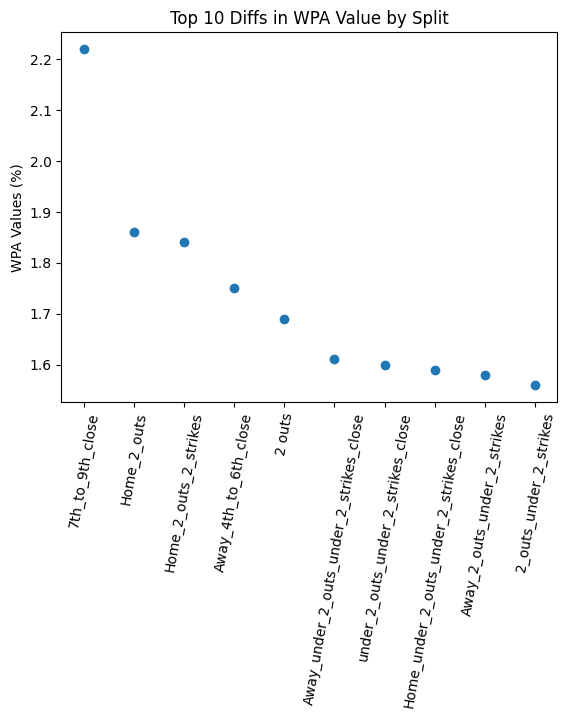

In [ ]:
df_WPA_plot = df_outputs_WPA.iloc[0:10, 0]
plt.scatter(x = df_WPA_plot.index, y = df_WPA_plot)
plt.xticks(rotation=80)
plt.ylabel("WPA Values (%)")
plt.title("Top 10 Diffs in WPA Value by Split")

Text(0.5, 1.0, 'Top 10 Diffs in Run Value by Split')

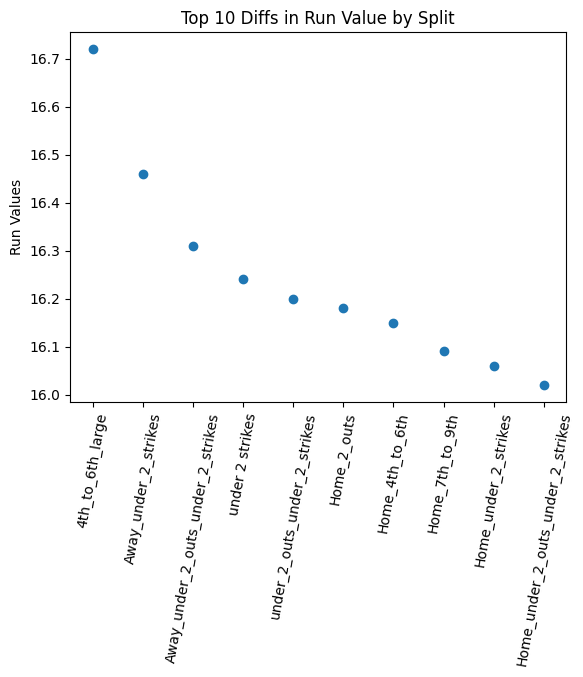

In [ ]:
df_Run_Value_plot = df_outputs_Run_Value.iloc[0:10, 1]
plt.scatter(x = df_Run_Value_plot.index, y = df_Run_Value_plot)
plt.xticks(rotation=80)
plt.ylabel("Run Values")
plt.title("Top 10 Diffs in Run Value by Split")

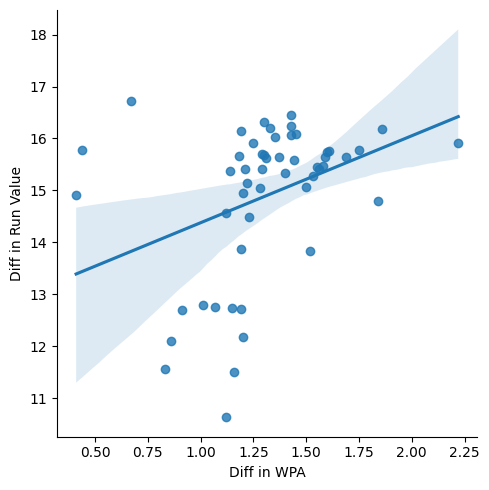

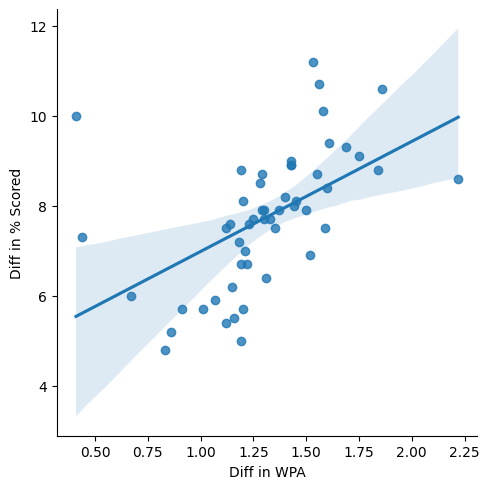

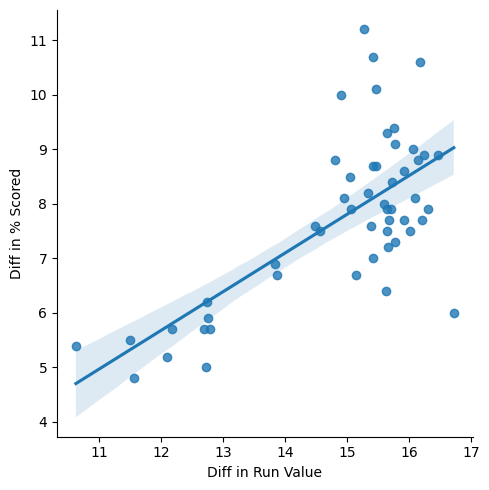

In [ ]:
#View how correlated different variables are:
sns.lmplot(data = df_outputs, x = "Diff in WPA", y = "Diff in Run Value")#.set_title("Diff in WPA vs Diff in Run Value")
sns.lmplot(data = df_outputs, x = "Diff in WPA", y = "Diff in % Scored")#.set_title("Diff in WPA vs Diff in % Scored")
sns.lmplot(data = df_outputs, x = "Diff in Run Value", y = "Diff in % Scored")#.set_title("Diff in Run Value vs Diff in % Scored")

In [ ]:
df_outputs.iloc[:, 0:3].corr()

,Diff in WPA,Diff in Run Value,Diff in % Scored
Diff in WPA,1.000000,0.367439,0.523998
Diff in Run Value,0.367439,1.000000,0.692982
Diff in % Scored,0.523998,0.692982,1.000000


# **2022-2023 RISP Approach Test 1 Team**

In [ ]:
df_22 = statcast(start_dt="2022-04-07", end_dt="2022-10-05")[["game_pk", "inning", "inning_topbot",
                                                             "outs_when_up", "on_2b",
                                                             "on_3b", "estimated_woba_using_speedangle",
                                                             "post_away_score",
                                                             "post_home_score",
                                                             "balls", "strikes",
                                                           "events", "batter", "delta_home_win_exp",
                                                           "away_score", "home_score", "on_1b",
                                                              "delta_run_exp", "des", "home_team", "away_team"]]

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 182/182 [02:28<00:00,  1.22it/s]
/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the resul

In [ ]:
df_22["on_3b"] = df_22["on_3b"].fillna(0) #Instead of NA signaling no runner on the base have 0 indicate no runner on the base
df_22["on_2b"] = df_22["on_2b"].fillna(0)
df_22["on_1b"] = df_22["on_1b"].fillna(0)
data = df_22[df_22['events'].notna()] #drop NA values in events (pitches) so now play by play and not pitch by pitch
data = data[data['delta_home_win_exp'].notna()] #drop NAs in delta home win exp
data = data[data['delta_run_exp'].notna()] #drop NAs in delta run exp
data = data[data["des"].str.contains("bunt")==False] #drop bunts
two_strike_hitters_IDs = [547989, 641355, 593428, 592192, 666185, 592206, 650489, 624424,
                          661388, 575929, 543063, 443558, 518595, 646240, 572816, 596748,
                          670770, 665926, 502671, 665489, 547180, 546318, 672386, 666139,
                          516782, 641857, 425877, 571976, 607043, 658668, 621566, 607054,
                          595777, 405395, 623912, 650859, 623993, 596103, 669257, 624641,
                          621035, 650402, 607208, 649966]
df2 = data[~data['batter'].isin(two_strike_hitters_IDs)]

df_22_23 = pd.concat([df, df2])

In [ ]:
RISP = df_22_23[(df_22_23["on_3b"] > 0) | (df_22_23["on_2b"] > 0)]

In [ ]:
RISP_home_team_hitting = RISP[RISP["inning_topbot"] == "Bot"]
RISP_home_team_hitting["home_team"].value_counts()

,count
home_team,
AZ,1513
TEX,1504
MIA,1490
CLE,1481
KC,1478
PIT,1465
CHC,1464
MIN,1460
SEA,1459


In [ ]:
RISP_away_team_hitting = RISP[RISP["inning_topbot"] == "Top"]
RISP_away_team_hitting["away_team"].value_counts()

,count
away_team,
SEA,1647
TEX,1540
AZ,1509
CLE,1488
HOU,1485
CHC,1452
MIA,1450
MIN,1436
CIN,1407


In [ ]:
RISP_team_hitting = RISP_away_team_hitting["away_team"].value_counts() + RISP_home_team_hitting["home_team"].value_counts()
RISP_team_hitting.sort_values(ascending = False)

,count
SEA,3106
TEX,3044
AZ,3022
CLE,2969
MIA,2940
CHC,2916
MIN,2896
HOU,2846
PIT,2838
KC,2790


In [ ]:
RISP_away_SEA = RISP_away_team_hitting[RISP_away_team_hitting["away_team"] == "SEA"]
RISP_home_SEA = RISP_home_team_hitting[RISP_home_team_hitting["home_team"] == "SEA"]

RISP_away_TEX = RISP_away_team_hitting[RISP_away_team_hitting["away_team"] == "TEX"]
RISP_home_TEX = RISP_home_team_hitting[RISP_home_team_hitting["home_team"] == "TEX"]

RISP_away_AZ = RISP_away_team_hitting[RISP_away_team_hitting["away_team"] == "AZ"]
RISP_home_AZ = RISP_home_team_hitting[RISP_home_team_hitting["home_team"] == "AZ"]

In [ ]:
RISP_SEA = pd.concat([RISP_away_SEA, RISP_home_SEA])
RISP_TEX = pd.concat([RISP_away_TEX, RISP_home_TEX])
RISP_AZ = pd.concat([RISP_away_AZ, RISP_home_AZ])

In [ ]:
RISP_SEA_WS = win_score(RISP_SEA)
RISP_TEX_WS = win_score(RISP_TEX)
RISP_AZ_WS = win_score(RISP_AZ)

In [ ]:
RISP_SEA_AT = approach_test(RISP_SEA, 10)
RISP_TEX_AT = approach_test(RISP_TEX, 10)
RISP_AZ_AT = approach_test(RISP_AZ, 10)

**Output Table:**

In [ ]:
index_labels = ['RISP_SEA', 'RISP_TEX', "RISP_AZ"]
column_lables = ["Size of Dataframe", "WPA", "Run Value", "Percent Scored", "WPA_Adjusted",
                 "Run Value_Adjusted", "Percent Scored_Adjusted"]
df_outputs = pd.DataFrame([[len(RISP_SEA), RISP_SEA_WS[0], RISP_SEA_WS[1], RISP_SEA_WS[2], RISP_SEA_AT[0], RISP_SEA_AT[1], RISP_SEA_AT[2]],
 [len(RISP_TEX), RISP_TEX_WS[0], RISP_TEX_WS[1], RISP_TEX_WS[2], RISP_TEX_AT[0], RISP_TEX_AT[1], RISP_TEX_AT[2]],
 [len(RISP_AZ), RISP_AZ_WS[0], RISP_AZ_WS[1], RISP_AZ_WS[2], RISP_AZ_AT[0], RISP_AZ_AT[1], RISP_AZ_AT[2]]], columns = column_lables, index=index_labels)

WPA_Diff = df_outputs.iloc[:, 4] - df_outputs.iloc[:, 1]
RV_Diff = df_outputs.iloc[:, 5] - df_outputs.iloc[:, 2]
PS_Diff = df_outputs.iloc[:, 6] - df_outputs.iloc[:, 3]

df_outputs.insert(0, "Diff in WPA", WPA_Diff.values, True)
df_outputs.insert(1, "Diff in Run Value", RV_Diff.values, True)
df_outputs.insert(2, "Diff in % Scored", PS_Diff.values, True)

df_outputs.sort_values(by = ["Diff in WPA"], ascending=False) #

,Diff in WPA,Diff in Run Value,Diff in % Scored,Size of Dataframe,WPA,Run Value,Percent Scored,WPA_Adjusted,Run Value_Adjusted,Percent Scored_Adjusted
RISP_AZ,1.47,16.59,8.2,3022,0.04,2.00,25.1,1.51,18.59,33.3
RISP_SEA,1.29,14.99,4.8,3106,-0.29,3.32,23.0,1.00,18.31,27.8
RISP_TEX,1.19,16.22,8.1,3044,-0.04,5.60,26.0,1.15,21.82,34.1


# **Miscellaneous RISP Stats**

In [ ]:
RISP = data[(data["on_3b"] > 0) | (data["on_2b"] > 0)]

BIP = RISP[RISP["events"].isin(["single", "double", "triple", "home_run", "field_out", "force_out",
                              "sac_fly", "grounded_into_double_play", "fielders_choice_out",
                              "fielders_choice", "double_play", "sac_fly_double_play",
                               "triple_play", "field_error"])]
print("With RISP how often is there a _ (as a percent):")

print("BIP:", round((len(BIP)/len(RISP) * 100),1))

BIP_no_homer = BIP[~BIP["events"].isin(["home_run"])]
print("BIP that is not a homer:", round((len(BIP_no_homer)/len(RISP) * 100),1))

HR = RISP[RISP["events"] == "home_run"]
print("Home Run:", round((len(HR)/len(RISP) * 100),1))

XBH = RISP[(RISP["events"] == "home_run") | (RISP["events"] == "triple") |
                      (RISP["events"] == "double")]
print("XBH:", round((len(XBH)/len(RISP) * 100),1))

single = RISP[RISP["events"] == "single"]
print("Single:", round((len(single)/len(RISP) * 100),1))

single_2_strikes = single[single["strikes"] == 2]
print("Single with 2 strikes:", round((len(single_2_strikes)/len(RISP) * 100),1))

HR_2_strikes = HR[HR["strikes"] == 2]
print("HR with 2 strikes:", round((len(HR_2_strikes)/len(RISP) * 100),1))

XBH_2_strikes = XBH[XBH["strikes"] == 2]
print("XBH with 2 strikes:", round((len(XBH_2_strikes)/len(RISP) * 100),1))

strikeout = RISP[RISP["events"] == "strikeout"]
print("Strikeout:", round((len(strikeout)/len(RISP) * 100),1))

ground_double_play = RISP[RISP["events"] == "grounded_into_double_play"]
print("GIDP:", round((len(ground_double_play)/len(RISP) * 100),1))

With RISP how often is there a _ (as a percent):
BIP: 67.6
BIP that is not a homer: 64.8
Home Run: 2.8
XBH: 7.7
Single: 14.1
Single with 2 strikes: 5.4
HR with 2 strikes: 0.9
XBH with 2 strikes: 2.7
Strikeout: 21.7
GIDP: 2.7


In [ ]:
print("What is the avg. change in Win Exp., Run Exp., and Percent of Times a Run Scores for _:")
print("BIP:", win_score(BIP))
print("BIP that is not a homer:", win_score(BIP_no_homer))
print("HR:", win_score(HR))
print("HR with 2 strikes:", win_score(HR_2_strikes))
print("XBH:", win_score(XBH))
print("Single:", win_score(single))
print("XBH with 2 strikes:", win_score(XBH_2_strikes))
print("Single with 2 strikes:", win_score(single_2_strikes))
print("Strikeout:", win_score(strikeout))
print("GIDP:", win_score(ground_double_play))

What is the avg. change in Win Exp., Run Exp., and Percent of Times a Run Scores for _:
BIP: (0.84, 12.03, 35.4)
BIP that is not a homer: (0.08, 3.65, 32.7)
HR: (18.63, 208.57, 99.9)
HR with 2 strikes: (20.33, 217.11, 99.7)
XBH: (14.31, 161.51, 99.3)
Single: (8.23, 90.3, 76.7)
XBH with 2 strikes: (14.24, 163.79, 99.0)
Single with 2 strikes: (8.26, 96.28, 75.9)
Strikeout: (-4.66, -37.69, 0.1)
GIDP: (-9.8, -61.94, 8.7)
